In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [75]:
dataset_path = "../Data/features_30_sec.csv"

data = pd.read_csv(dataset_path)

spectral_features = [
    "chroma_stft_mean", "chroma_stft_var",
    "spectral_centroid_mean", "spectral_centroid_var",
    "rolloff_mean", "rolloff_var"
]
rhythmic_features = ["tempo"]
mfcc_features = [
    "mfcc1_mean", "mfcc1_var",
    "mfcc2_mean", "mfcc2_var",
    "mfcc3_mean", "mfcc3_var"
]

selected_features = spectral_features + rhythmic_features + mfcc_features

X = data[selected_features]
y = data["label"]

In [ ]:
#data pre-processing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [77]:
#finding k
k_values = range(1, 30)
cv_scores = []
test_k_vals = []

#Perform cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, scoring='accuracy')
    cv_scores.append(scores.mean())

#Finding most optimal, median, and least optimal k's
#optimal
optimal_k = k_values[np.argmax(cv_scores)]
print("Most Optimal k: ", optimal_k)
test_k_vals.append(optimal_k)
#median
median_index = np.argsort(cv_scores)[len(cv_scores) // 2]
med_k = k_values[median_index]
print("Median k: ", med_k)
#least optimal
test_k_vals.append(med_k)
worst_k = k_values[np.argmin(cv_scores)]
print("Least Optimal k: ", worst_k)
test_k_vals.append(worst_k)

Most Optimal k:  14
Median k:  25
Least Optimal k:  2


FOR K =  14
Score:  0.5366666666666666
Class report: 
               precision    recall  f1-score   support

       blues       0.52      0.50      0.51        30
   classical       0.88      0.97      0.92        30
     country       0.45      0.57      0.50        30
       disco       0.33      0.53      0.41        30
      hiphop       0.35      0.27      0.30        30
        jazz       0.77      0.57      0.65        30
       metal       0.65      0.67      0.66        30
         pop       0.56      0.63      0.59        30
      reggae       0.56      0.50      0.53        30
        rock       0.36      0.17      0.23        30

    accuracy                           0.54       300
   macro avg       0.54      0.54      0.53       300
weighted avg       0.54      0.54      0.53       300



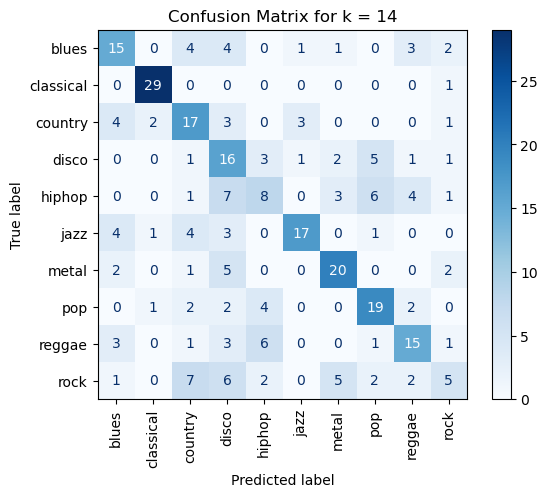

FOR K =  25
Score:  0.49333333333333335
Class report: 
               precision    recall  f1-score   support

       blues       0.55      0.37      0.44        30
   classical       0.88      0.97      0.92        30
     country       0.46      0.57      0.51        30
       disco       0.24      0.47      0.31        30
      hiphop       0.28      0.17      0.21        30
        jazz       0.70      0.53      0.60        30
       metal       0.61      0.67      0.63        30
         pop       0.54      0.63      0.58        30
      reggae       0.48      0.50      0.49        30
        rock       0.18      0.07      0.10        30

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.48       300
weighted avg       0.49      0.49      0.48       300



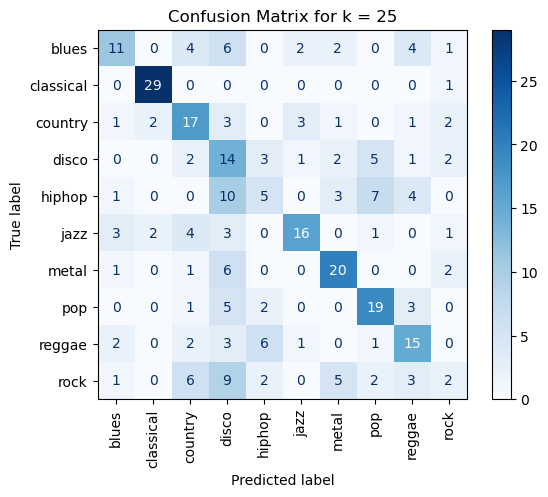

FOR K =  2
Score:  0.49
Class report: 
               precision    recall  f1-score   support

       blues       0.38      0.57      0.45        30
   classical       0.80      0.93      0.86        30
     country       0.36      0.50      0.42        30
       disco       0.29      0.43      0.35        30
      hiphop       0.45      0.43      0.44        30
        jazz       0.68      0.43      0.53        30
       metal       0.56      0.47      0.51        30
         pop       0.61      0.63      0.62        30
      reggae       0.63      0.40      0.49        30
        rock       0.30      0.10      0.15        30

    accuracy                           0.49       300
   macro avg       0.51      0.49      0.48       300
weighted avg       0.51      0.49      0.48       300



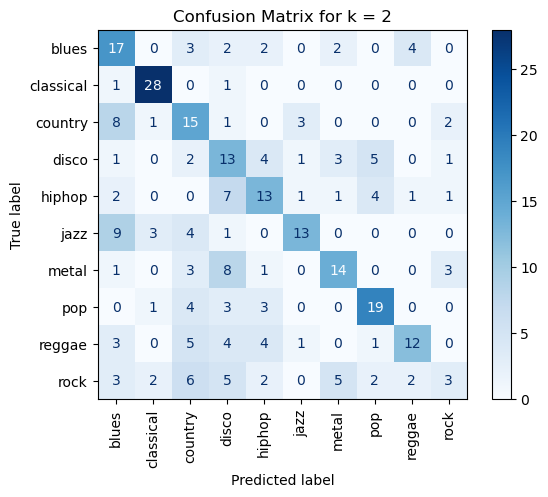

In [78]:
for k in test_k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print("FOR K = ", k)
    print("Score: ", score)
    print("Class report: \n", class_report)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for k = {k}")
    plt.xticks(rotation=90)
    plt.show()

FOR K =  14
Score:  0.38666666666666666
Class report: 
               precision    recall  f1-score   support

       blues       0.37      0.46      0.41        35
   classical       0.53      0.80      0.64        20
     country       0.31      0.14      0.19        37
       disco       0.26      0.29      0.28        34
      hiphop       0.24      0.29      0.26        24
        jazz       0.43      0.36      0.39        33
       metal       0.53      0.77      0.63        30
         pop       0.57      0.57      0.57        23
      reggae       0.34      0.45      0.39        29
        rock       0.08      0.03      0.04        35

    accuracy                           0.39       300
   macro avg       0.37      0.42      0.38       300
weighted avg       0.35      0.39      0.36       300



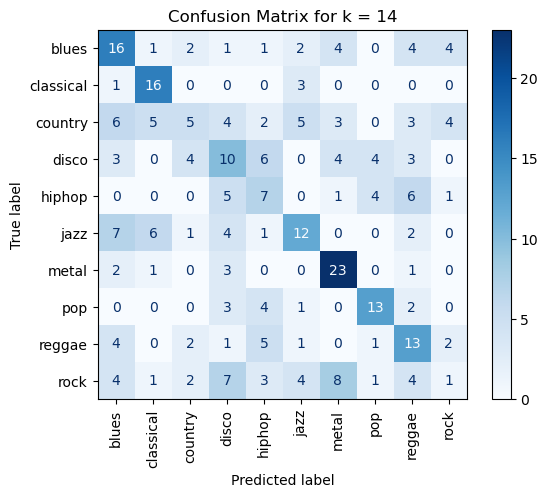

In [ ]:
from sklearn.decomposition import PCA
#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
#Train the KNN classifier on the reduced data
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#Evaluate the model
score = knn.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("FOR K = ", 14)
print("Score: ", score)
print("Class report: \n", class_report)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for k = 14")
plt.xticks(rotation=90)
plt.show()